In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [385]:
df = pd.read_csv("placement_dataset.csv")

In [386]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [388]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [389]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [390]:
df['salary'].nunique()

45

In [391]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [392]:
# remove sl_no
df = df.drop('sl_no', axis=1)

In [393]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [394]:
df['salary'].isnull().sum()

67

In [395]:
df['salary'] = df['salary'].fillna(0)

In [396]:
df['salary'].isnull().sum()

0

In [397]:
import warnings
warnings.filterwarnings('ignore') 

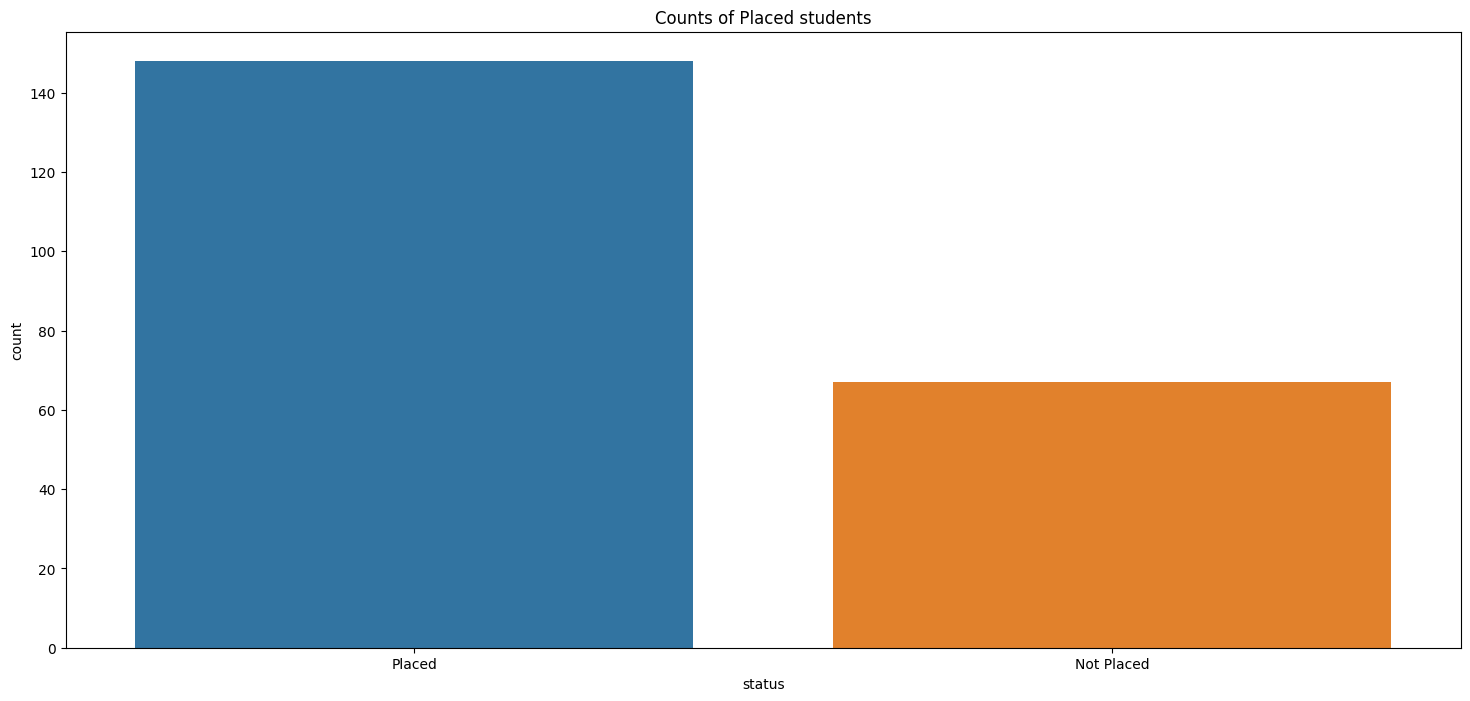

In [398]:
f,ax=plt.subplots(1,1,figsize=(18,8))
sns.countplot(x = 'status',data = df)
ax.set_title('Counts of Placed students')
plt.show()

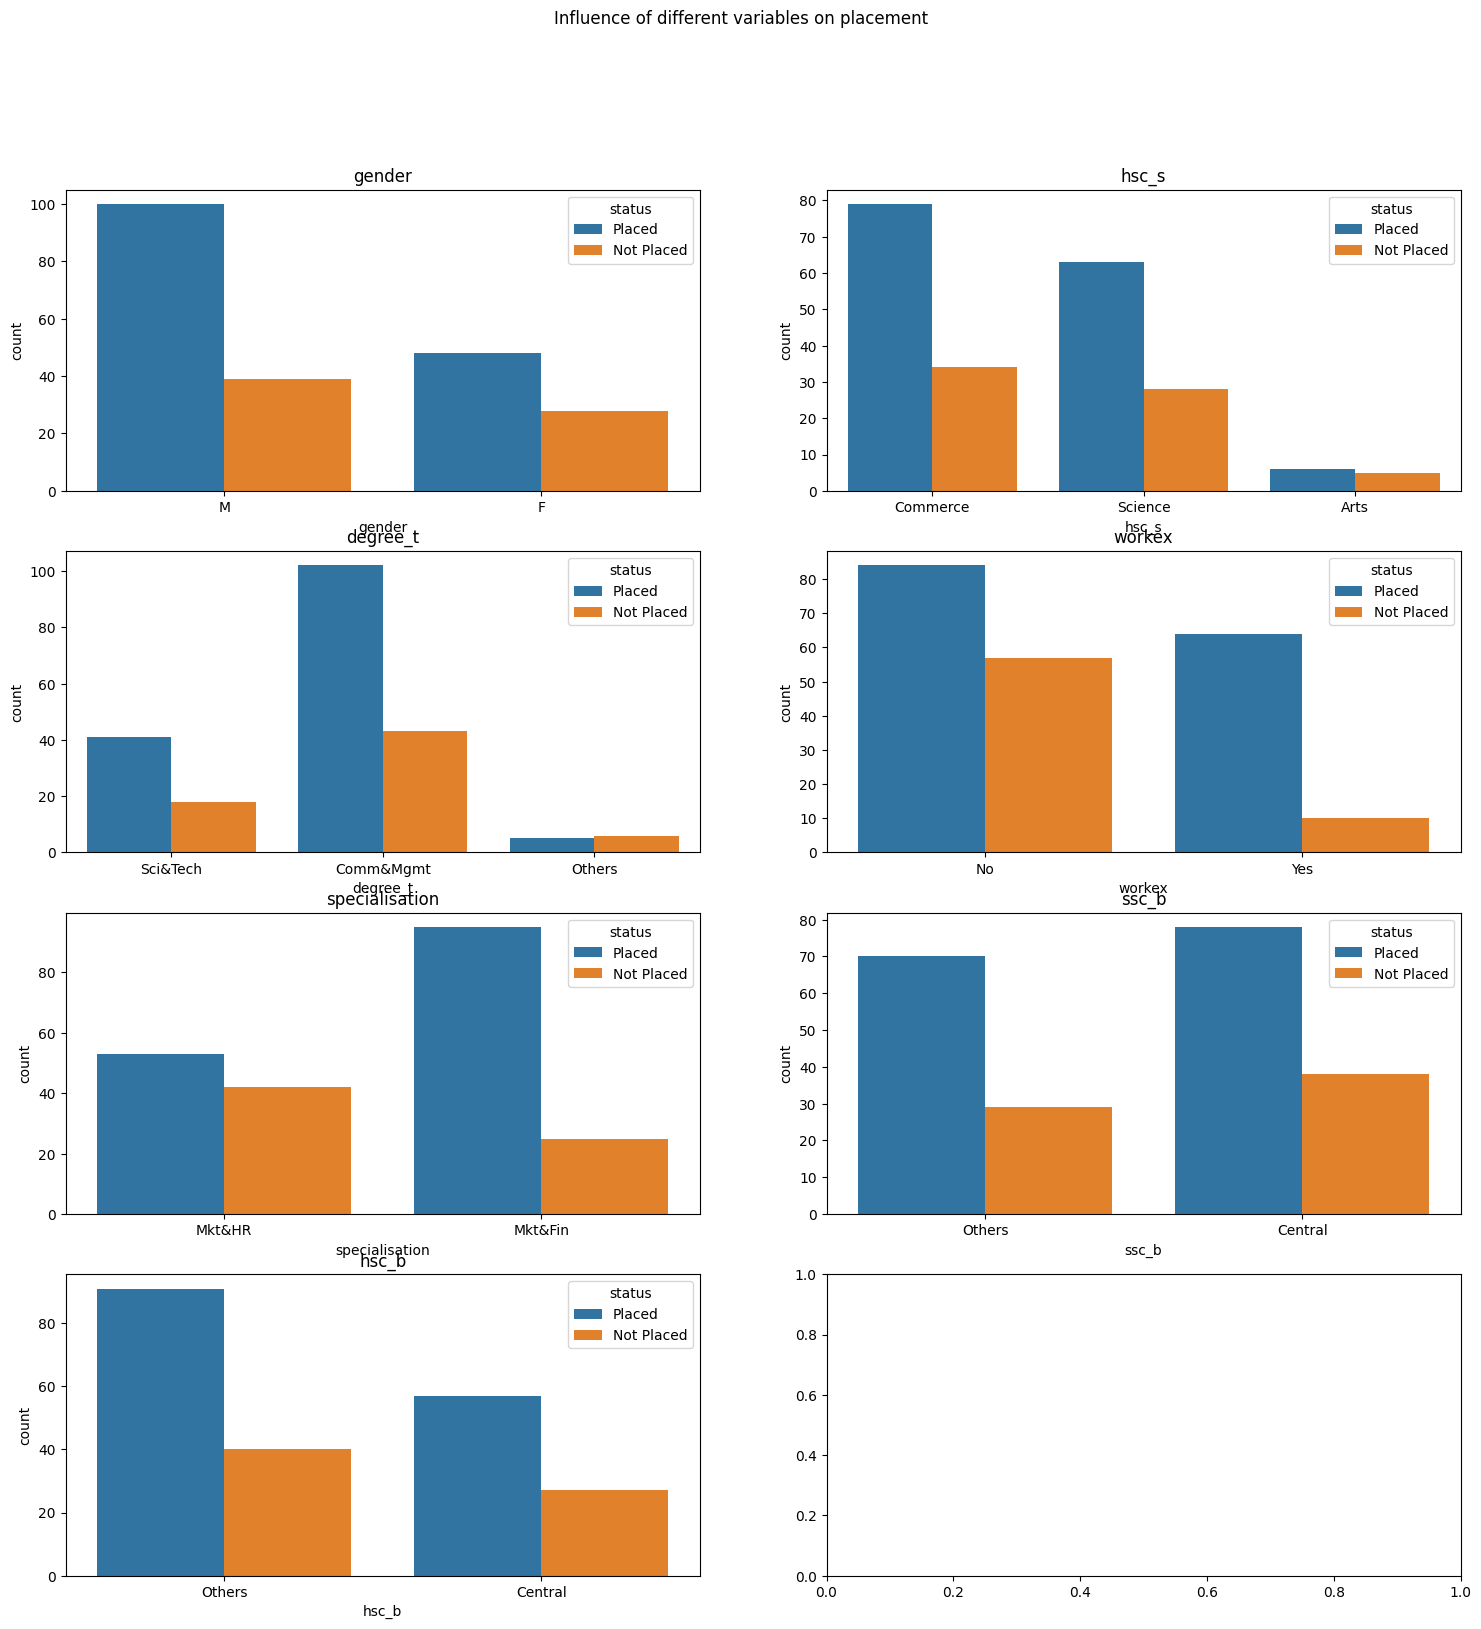

In [399]:
f,ax=plt.subplots(4,2,figsize=(18,18))
f.suptitle('Influence of different variables on placement')
sns.countplot(ax=ax[0][0], x = 'gender', hue='status',data = df)
ax[0][0].set_title('gender')
sns.countplot(ax=ax[0][1], x = 'hsc_s', hue='status',data = df)
ax[0][1].set_title('hsc_s')
sns.countplot(ax=ax[1][0], x = 'degree_t', hue='status',data = df)
ax[1][0].set_title('degree_t')
sns.countplot(ax=ax[1][1], x = 'workex', hue='status',data = df)
ax[1][1].set_title('workex')
sns.countplot(ax=ax[2][0], x = 'specialisation', hue='status',data = df)
ax[2][0].set_title('specialisation')
sns.countplot(ax=ax[2][1], x = 'ssc_b', hue='status',data = df)
ax[2][1].set_title('ssc_b')
sns.countplot(ax=ax[3][0], x = 'hsc_b', hue='status',data = df)
ax[3][0].set_title('hsc_b')
plt.show()

In [400]:
from sklearn.preprocessing import LabelEncoder
cols = ['gender', 'ssc_b', 'hsc_b','hsc_s', 'degree_t','workex','specialisation', 'status']
le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [401]:
df[cols].nunique()

gender            2
ssc_b             2
hsc_b             2
hsc_s             3
degree_t          3
workex            2
specialisation    2
status            2
dtype: int64

In [402]:
for col in cols:
    print(f"{col} : {df[col].unique()}")

gender : [1 0]
ssc_b : [1 0]
hsc_b : [1 0]
hsc_s : [1 2 0]
degree_t : [2 0 1]
workex : [0 1]
specialisation : [1 0]
status : [1 0]


In [403]:
df.info()
# all variables were converted to numerical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int32  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int32  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int32  
 5   hsc_s           215 non-null    int32  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int32  
 8   workex          215 non-null    int32  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    int32  
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int32  
 13  salary          215 non-null    float64
dtypes: float64(6), int32(8)
memory usage: 16.9 KB


<AxesSubplot: >

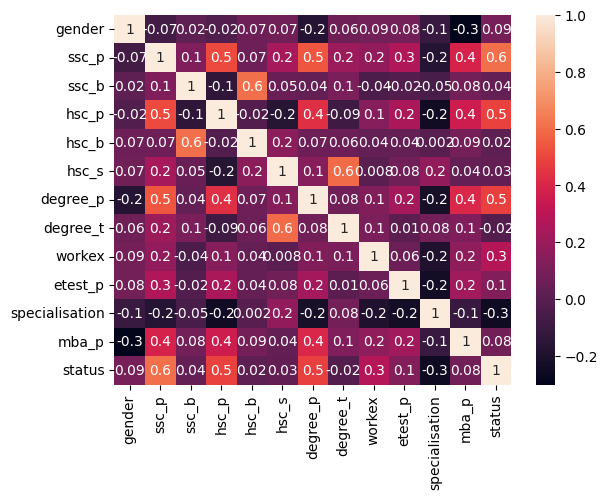

In [404]:
sns.heatmap(df2.corr(), annot=True, fmt='.1g')

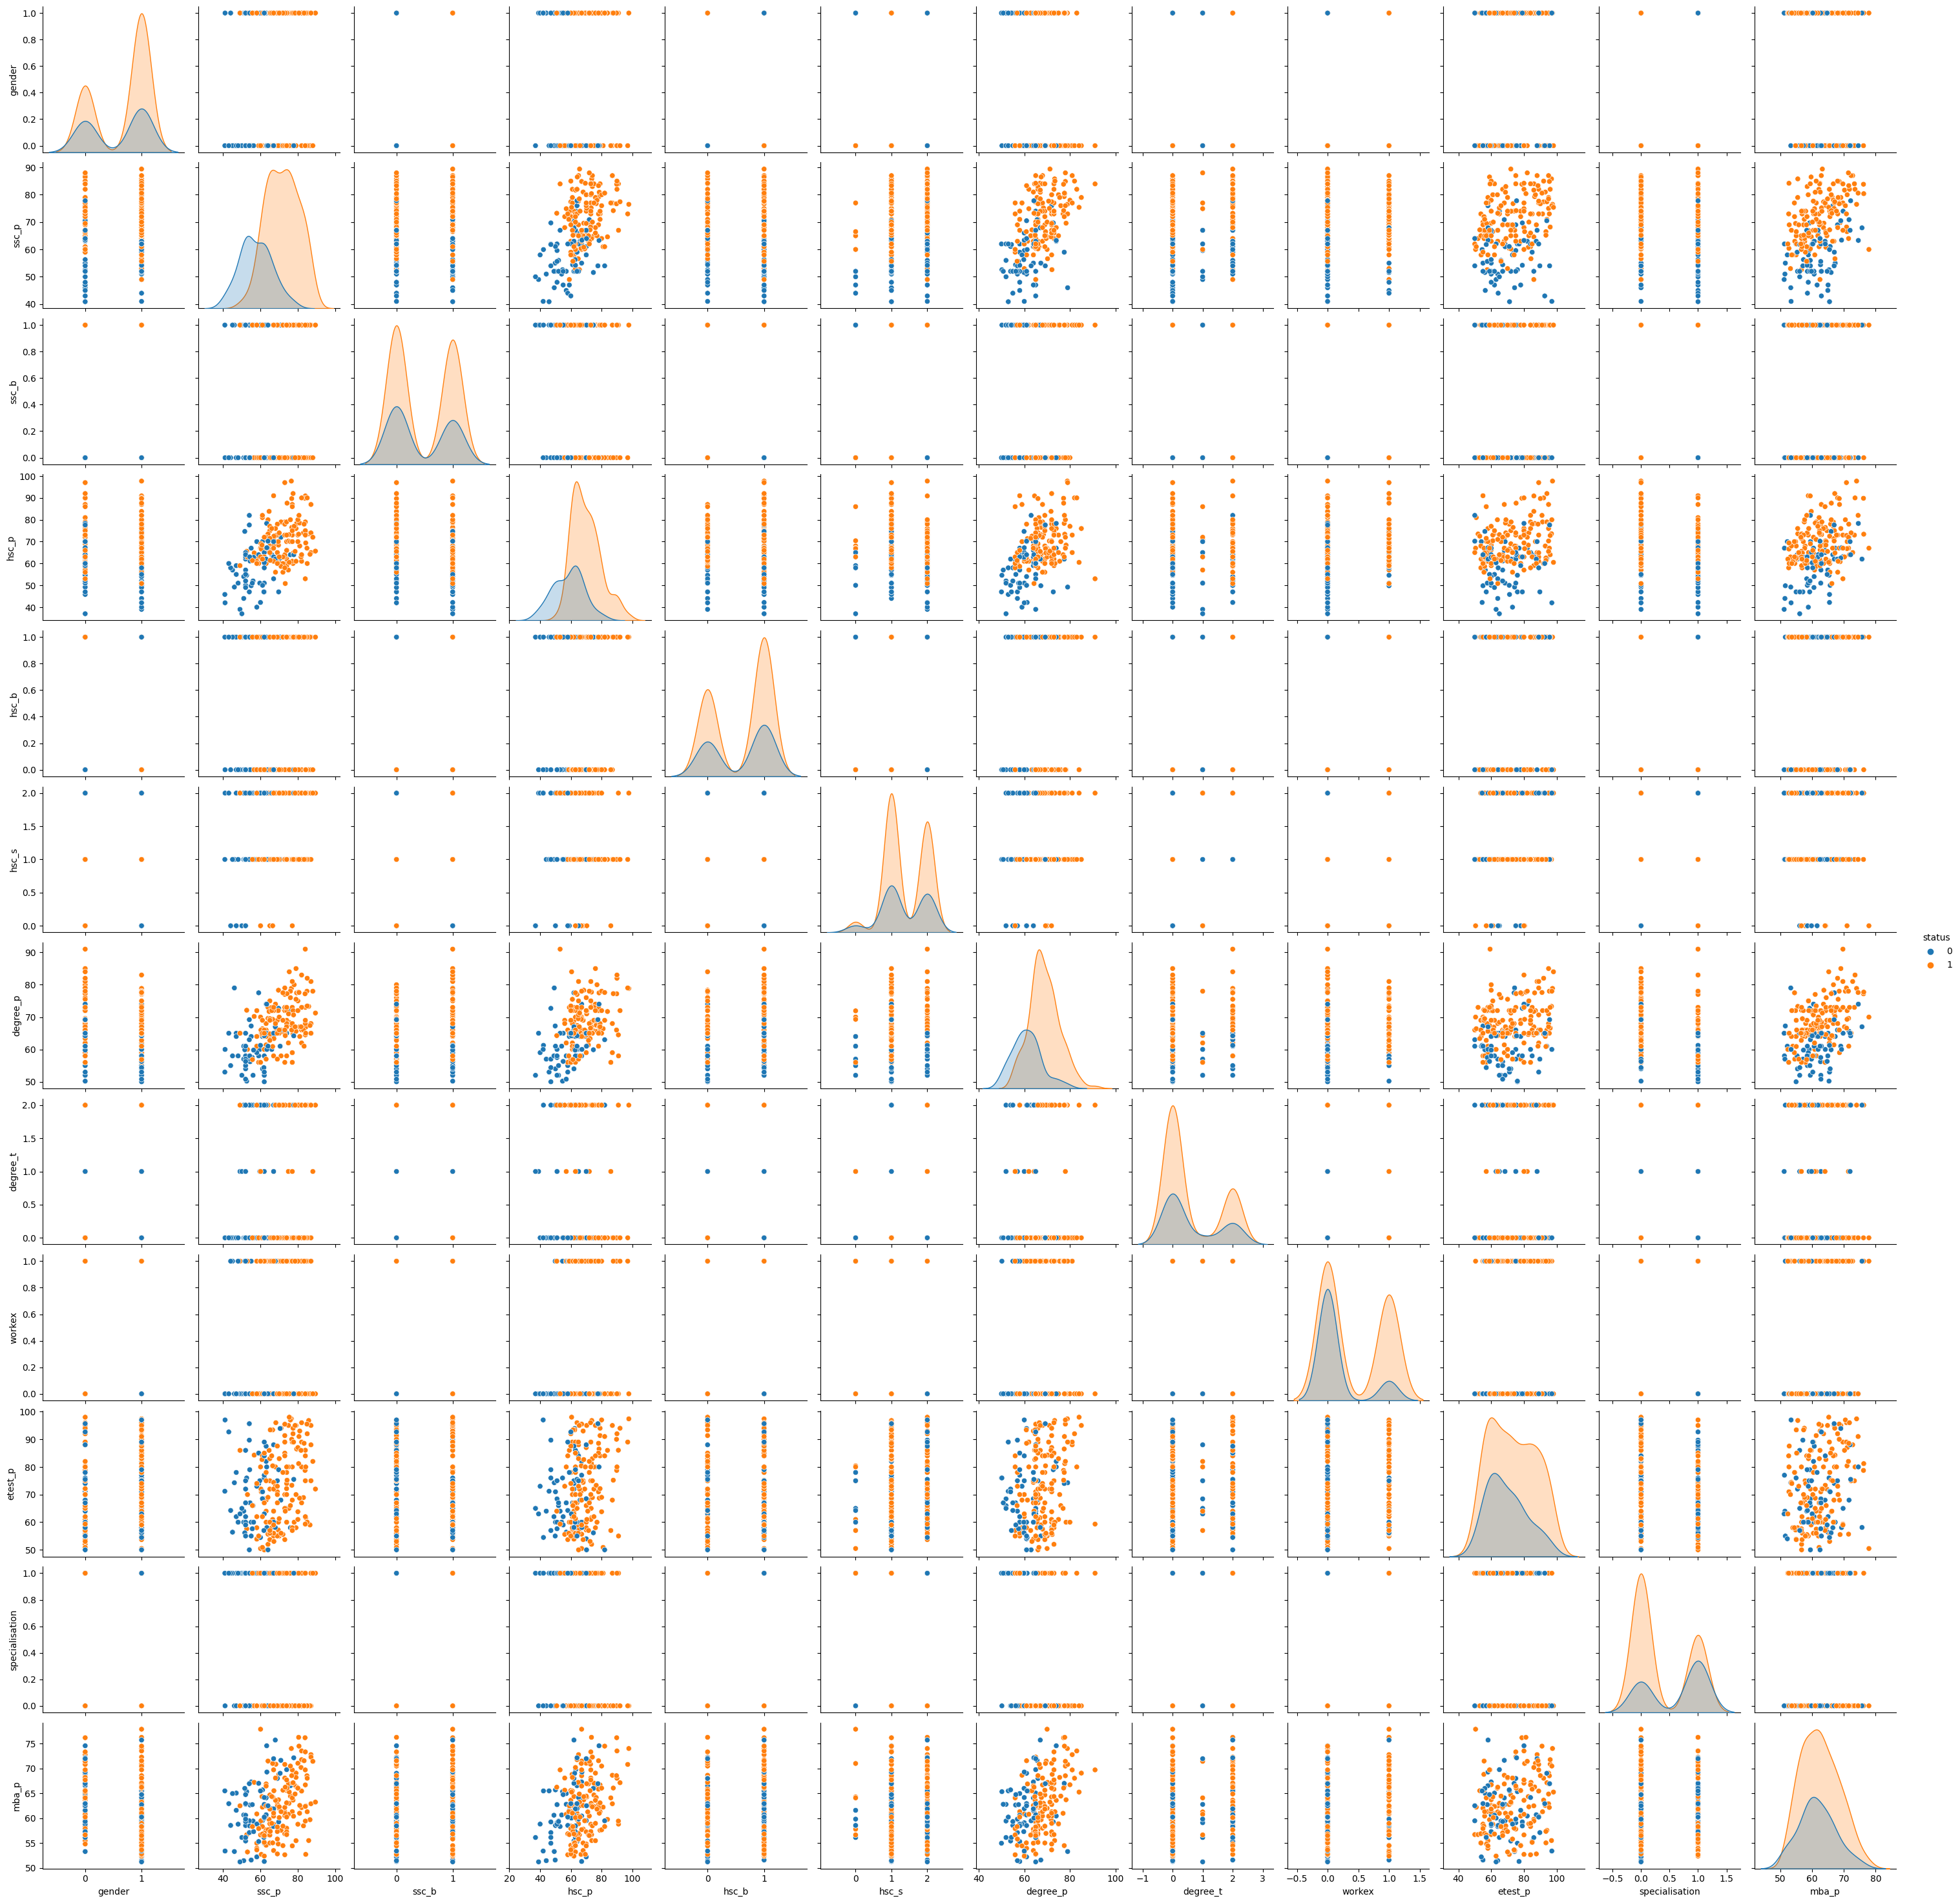

In [405]:
sns.pairplot(df2,hue="status")

# Training Model for Classification Task

In [406]:
X = df.iloc[:,:-2].values
y = df.iloc[:,-2].values
print(X.shape)
print(y.shape)

(215, 12)
(215,)


In [407]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(193, 12) (193,)
(22, 12) (22,)


In [408]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [409]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
print(f"train accuracy: {train_score*100:.4f} %")
print(f"test accuracy: {lr_test_score*100:.4f} %")
cr = classification_report(y_test, y_pred)
print(f"Classification Report: \n\n {cr}")
print(f1_score(y_test, y_pred))

train accuracy: 88.6010 %
test accuracy: 81.8182 %
Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.76      1.00      0.87        13

    accuracy                           0.82        22
   macro avg       0.88      0.78      0.79        22
weighted avg       0.86      0.82      0.80        22

0.8666666666666667


In [410]:
kc = KNeighborsClassifier(n_neighbors = 30)
kc.fit(X_train, y_train)
y_pred = kc.predict(X_test)
train_score = kc.score(X_train, y_train)
kc_test_score = kc.score(X_test, y_test)
print(f"train accuracy: {train_score*100:.4f} %")
print(f"test accuracy: {kc_test_score*100:.4f} %")
cr = classification_report(y_test, y_pred)
print(f"Classification Report: \n\n {cr}")
print(f1_score(y_test, y_pred))

train accuracy: 82.9016 %
test accuracy: 86.3636 %
Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.81      1.00      0.90        13

    accuracy                           0.86        22
   macro avg       0.91      0.83      0.85        22
weighted avg       0.89      0.86      0.86        22

0.896551724137931


In [411]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
train_score = nb.score(X_train, y_train)
nb_test_score = nb.score(X_test, y_test)
print(f"train accuracy: {train_score*100:.4f} %")
print(f"test accuracy: {nb_test_score*100:.4f} %")
cr = classification_report(y_test, y_pred)
print(f"Classification Report: \n\n {cr}")
print(f1_score(y_test, y_pred))

train accuracy: 84.9741 %
test accuracy: 81.8182 %
Classification Report: 

               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.85      0.85      0.85        13

    accuracy                           0.82        22
   macro avg       0.81      0.81      0.81        22
weighted avg       0.82      0.82      0.82        22

0.8461538461538461


In [412]:
sv = SVC()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
train_score = sv.score(X_train, y_train)
sv_test_score = sv.score(X_test, y_test)
print(f"train accuracy: {train_score*100:.4f} %")
print(f"test accuracy: {sv_test_score*100:.4f} %")
cr = classification_report(y_test, y_pred)
print(f"Classification Report: \n\n {cr}")
print(f1_score(y_test, y_pred))

train accuracy: 83.9378 %
test accuracy: 81.8182 %
Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.76      1.00      0.87        13

    accuracy                           0.82        22
   macro avg       0.88      0.78      0.79        22
weighted avg       0.86      0.82      0.80        22

0.8666666666666667


In [413]:
dc = DecisionTreeClassifier(criterion = "gini", max_depth = 3)
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)
train_score = dc.score(X_train, y_train)
dc_test_score = dc.score(X_test, y_test)
print(f"train accuracy: {train_score*100:.4f} %")
print(f"test accuracy: {dc_test_score*100:.4f} %")
cr = classification_report(y_test, y_pred)
print(f"Classification Report: \n\n {cr}")
print(f1_score(y_test, y_pred))

train accuracy: 88.6010 %
test accuracy: 81.8182 %
Classification Report: 

               precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.76      1.00      0.87        13

    accuracy                           0.82        22
   macro avg       0.88      0.78      0.79        22
weighted avg       0.86      0.82      0.80        22

0.8666666666666667


In [414]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(f"train accuracy: {train_score*100:.4f} %")
print(f"test accuracy: {rf_test_score*100:.4f} %")
cr = classification_report(y_test, y_pred)
print(f"Classification Report: \n\n {cr}")
print(f1_score(y_test, y_pred))

train accuracy: 100.0000 %
test accuracy: 81.8182 %
Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.80      0.92      0.86        13

    accuracy                           0.82        22
   macro avg       0.83      0.79      0.80        22
weighted avg       0.82      0.82      0.81        22

0.8571428571428571


In [415]:
import pickle

In [416]:
#pickle.dump(rf, open('clf_model.pkl','wb'))

## Training Model for Regression task

In [417]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X.shape)
print(y.shape)

(215, 13)
(215,)


In [418]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(193, 13) (193,)
(22, 13) (22,)


In [419]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [420]:
def score(y_test, y_pred):
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred)}")
    r2 = r2_score(y_test, y_pred)*100
    print(f"R2 Score: {r2}")
    return r2

In [421]:
lg = LinearRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print("Train accuracy:", (lg.score(X_train,y_train))*100)
print("Test accuracy:", (lg.score(X_test,y_test))*100)
r2_lg = score(y_test, y_pred)

Train accuracy: 76.3828832191453
Test accuracy: 85.60146942003249
Mean Absolute Error: 41062.68242618378
Mean Squared Error: 3255859992.647324
Root Mean Squared Error: 57060.143643767005
R2 Score: 85.60146942003249


In [422]:
rg = Ridge()
rg.fit(X_train,y_train)
y_pred = rg.predict(X_test)
print("Train accuracy:", (rg.score(X_train,y_train))*100)
print("Test accuracy:", (rg.score(X_test,y_test))*100)
r2_rg = score(y_test, y_pred)

Train accuracy: 76.29048394227708
Test accuracy: 86.17233718761386
Mean Absolute Error: 38538.14535003198
Mean Squared Error: 3126772825.3674855
Root Mean Squared Error: 55917.55382138498
R2 Score: 86.17233718761386


In [423]:
ls = Lasso()
ls.fit(X_train,y_train)
y_pred = ls.predict(X_test)
print("Train accuracy:", (ls.score(X_train,y_train))*100)
print("Test accuracy:", (ls.score(X_test,y_test))*100)
r2_ls = score(y_test, y_pred)

Train accuracy: 76.38288301132285
Test accuracy: 85.60186979274083
Mean Absolute Error: 41060.19325098024
Mean Squared Error: 3255769458.5837264
Root Mean Squared Error: 57059.3503168738
R2 Score: 85.60186979274083


In [424]:
en = ElasticNet()
en.fit(X_train,y_train)
y_pred = en.predict(X_test)
print("Train accuracy:", (en.score(X_train,y_train))*100)
print("Test accuracy:", (en.score(X_test,y_test))*100)
r2_en = score(y_test, y_pred)

Train accuracy: 50.47040174462263
Test accuracy: 60.74830997581502
Mean Absolute Error: 71447.74236883617
Mean Squared Error: 8875767321.100224
Root Mean Squared Error: 94211.2908366095
R2 Score: 60.74830997581502


In [425]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Train accuracy:", (dt.score(X_train,y_train))*100)
print("Test accuracy:", (dt.score(X_test,y_test))*100)
r2_dt = score(y_test, y_pred)

Train accuracy: 100.0
Test accuracy: 89.17912902497199
Mean Absolute Error: 24227.272727272728
Mean Squared Error: 2446863636.3636365
Root Mean Squared Error: 49465.782480050155
R2 Score: 89.17912902497199


In [426]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Train accuracy:", (rf.score(X_train,y_train))*100)
print("Test accuracy:", (rf.score(X_test,y_test))*100)
r2_rf = score(y_test, y_pred)

Train accuracy: 95.59216556962609
Test accuracy: 92.33104605596421
Mean Absolute Error: 24821.81818181818
Mean Squared Error: 1734138090.909091
Root Mean Squared Error: 41642.98369364389
R2 Score: 92.33104605596421


In [427]:
models = pd.DataFrame({
    'Algorithms': ['Linear Regressor', 'Ridge Regressor', 'Lasso Regressor', 'ElasticNet Regressor',
                   'Decision Tree Regressor', 'Random Forest Regressor'],
    'R2 Score': [ r2_lg, r2_rg, r2_ls, r2_en, r2_dt, r2_rf],
    })

In [428]:
models

,Algorithms,R2 Score
0,Linear Regressor,85.601469
1,Ridge Regressor,86.172337
2,Lasso Regressor,85.601870
3,ElasticNet Regressor,60.748310
4,Decision Tree Regressor,89.179129
5,Random Forest Regressor,92.331046


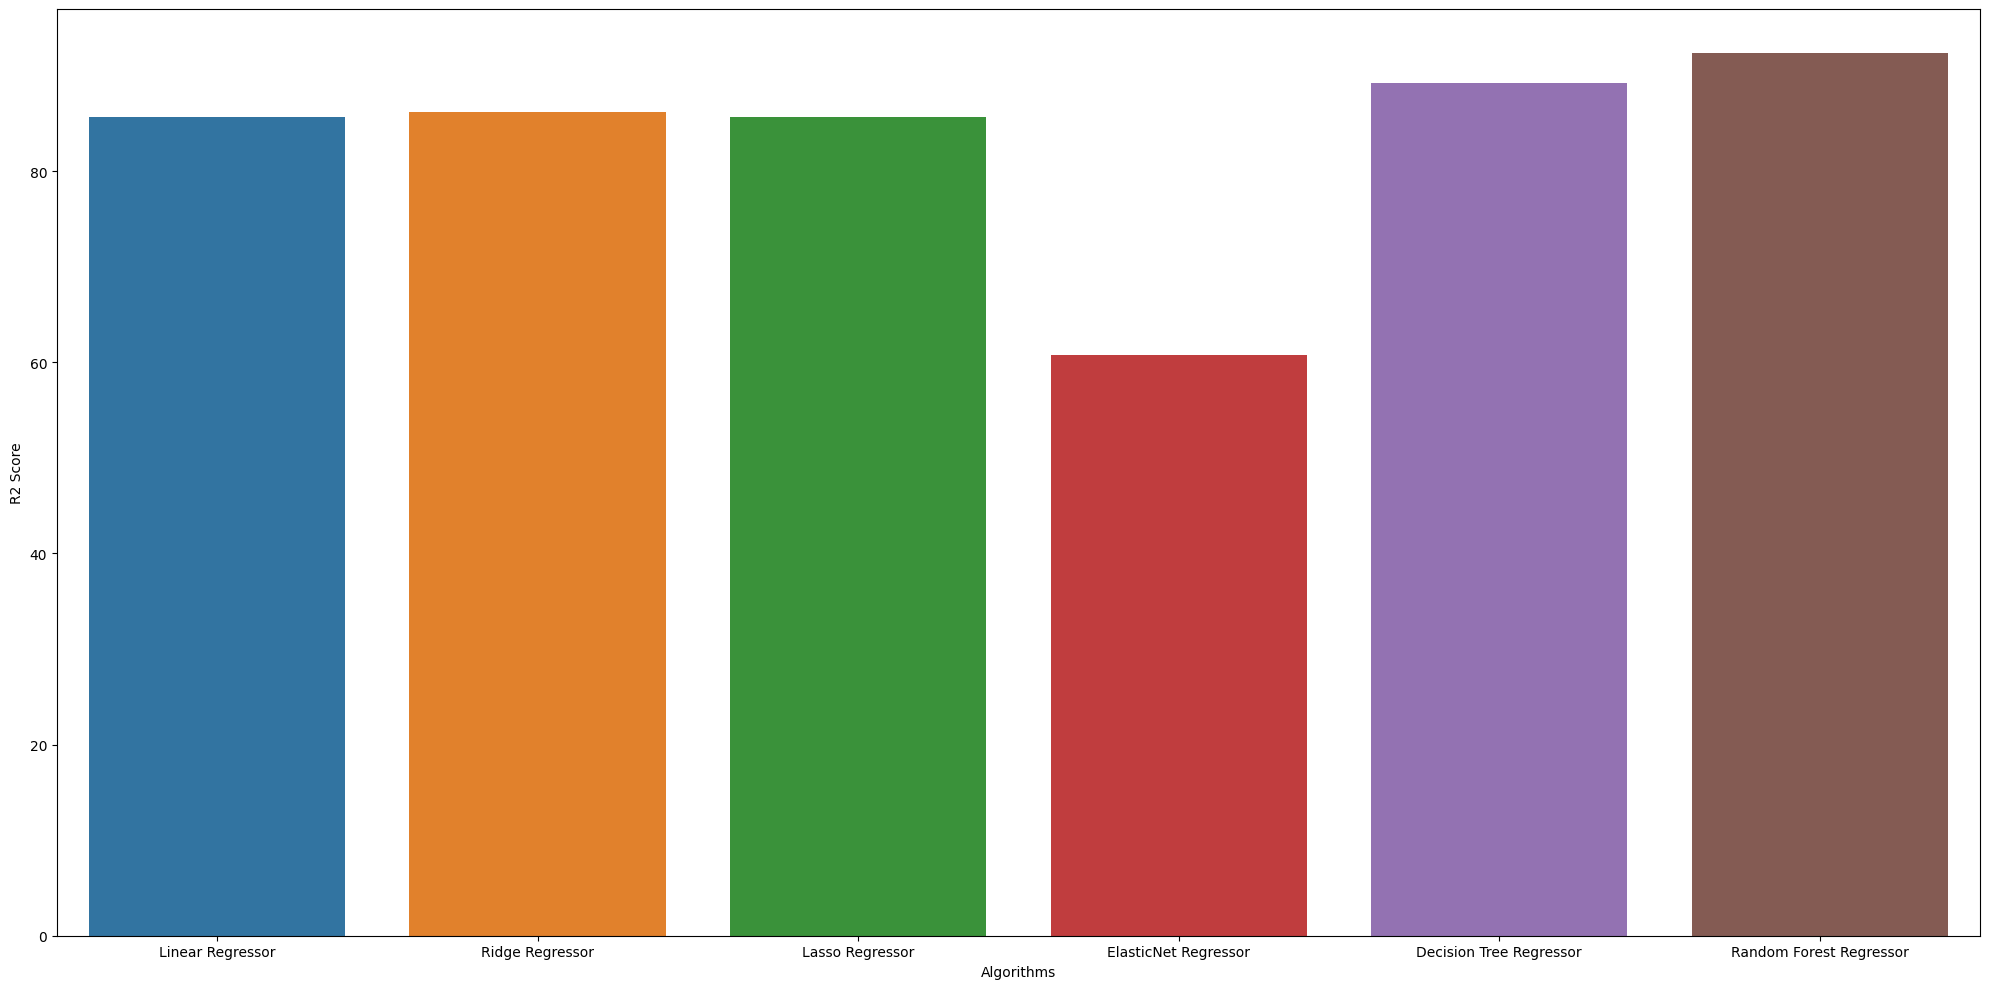

In [429]:
plt.figure(figsize=(20,10))
sns.barplot(x='Algorithms',y='R2 Score',data=models)
plt.tight_layout()
plt.show()

In [430]:
# pickle.dump(rf, open('reg_model.pkl','wb'))